In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import cv2
import numpy as np
import json
import matplotlib.pyplot as plt
import numpy as np
import h5py
import os
import glob
import scipy.io
import torch
from sklearn.metrics import confusion_matrix
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import pickle
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [ ]:
!unzip /content/drive/MyDrive/CAPSTONE/gtFine_trainvaltest.zip

In [ ]:
!unzip /content/drive/MyDrive/CAPSTONE/leftImg8bit_trainvaltest.zip

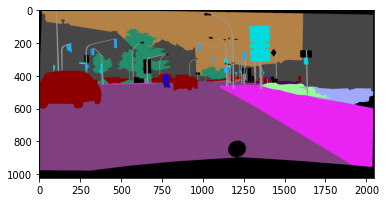

In [5]:
img=cv2.imread('/content/gtFine/train/monchengladbach/monchengladbach_000001_001936_gtFine_color.png',)
plt.imshow(img)

In [7]:
#Printing all the objects in image
# Opening JSON file 
f = open('/content/gtFine/train/aachen/aachen_000000_000019_gtFine_polygons.json',) 
data = json.load(f)
for i in range(len(data['objects'])):
  print(data['objects'][i]['label'])

road
sidewalk
car
car
car
sky
terrain
building
building
car
terrain
terrain
sidewalk
car
vegetation
car
pole
pole
pole
pole
car
traffic sign
car
pole
static
pole
car
pole
vegetation
pole
pole
vegetation
pole
pole
traffic sign
pole
car
static
static
pole
traffic sign
traffic sign
traffic sign
static
vegetation
static
vegetation
bicycle
person
traffic sign
pole
pole
person
car
traffic sign
pole
pole
license plate
terrain
rider
license plate
pole
traffic sign
traffic sign
traffic sign
bicycle
pole
traffic sign
static
pole
license plate
static
static
static
static
static
static
static
ego vehicle
out of roi


road
sidewalk
car
car
car
sky
terrain
building
building
car
terrain
terrain
sidewalk
car
vegetation
car
pole
pole
pole
pole
car
traffic sign
car
pole
static
pole
car
pole
vegetation
pole
pole
vegetation
pole
pole
traffic sign
pole
car
static
static
pole
traffic sign
traffic sign
traffic sign
static
vegetation
static
vegetation
bicycle
person
traffic sign
pole
pole
person
car
traffic sign
pole
pole
license plate
terrain
rider
license plate
pole
traffic sign
traffic sign
traffic sign
bicycle
pole
traffic sign
static
pole
license plate
static
static
static
static
static
static
static
ego vehicle
out of roi


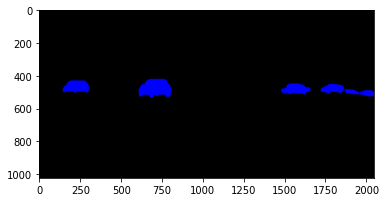

In [8]:
#Visualizing the object car of an image
img = np.zeros((1024, 2048,3), np.uint8)
for i in range(len(data['objects'])):
  print(data['objects'][i]['label'])
  if data['objects'][i]['label']=='car':
    x=data['objects'][i]['polygon']
    cv2.fillPoly(img, np.array([data['objects'][i]['polygon']]), (0, 0, 255))

plt.imshow(img)

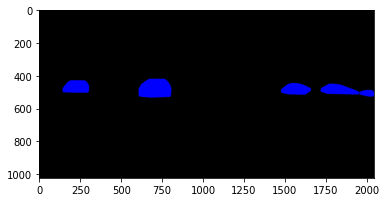

In [11]:
#Creatig convex hull on car
y=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.blur(y, (3, 3)) # blur the image
ret,thresh = cv2.threshold(blur,130,255,cv2.THRESH_TOZERO_INV)
imgplot = plt.imshow(thresh)

contour, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
hull = []
contours=[]
for i in contour:
    if cv2.contourArea(i)>800:
        contours.append(cv2.convexHull(i))

for i in range(len(contours)):
    # creating convex hull object for each contour
    hull.append(cv2.convexHull(contours[i], False))

for i in range(len(hull)):
    # color_contours = (0, 255, 0) # green - color for contours
    color = (255, 255, 255) # blue - color for convex hull
    img2=cv2.drawContours(y, hull, i, color, 1, 8)

img1 = np.zeros((1024, 2047, 3), np.uint8)
for i in range (len(hull)):
  cv2.fillPoly(img1, np.array([hull[i]]), (0, 0, 255))

plt.imshow(img1)
  

In [ ]:
#1.Car 2.bicycle or rider 3. bus 4.person 5.motorcycle
import json 
import cv2
import numpy as np
def create_data(path):
  f = open(path) 
  data = json.load(f)
  img = np.zeros((1024, 2048,3), np.uint8)
  output = np.zeros((128,256,5),dtype=int)
  input_img = np.zeros((1024, 2048,3),np.uint8)
  for i in range(len(data['objects'])):
    if data['objects'][i]['label']=='car':
      cv2.fillPoly(img, np.array([data['objects'][i]['polygon']]), (0, 0, 255))
      cv2.fillPoly(input_img, np.array([data['objects'][i]['polygon']]), (0, 0, 255))

  y=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  blur = cv2.blur(y, (3, 3)) # blur the image
  ret,thresh = cv2.threshold(blur,130,255,cv2.THRESH_TOZERO_INV)
  
  contour, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  hull = []
  contours=[]
  for i in contour:
      if cv2.contourArea(i)>800:
          contours.append(cv2.convexHull(i))

  for i in range(len(contours)):
      hull.append(cv2.convexHull(contours[i], False))

  for i in range(len(hull)):
      color = (255, 255, 255) # blue - color for convex hull
      img2=cv2.drawContours(y, hull, i, color, 1, 8)

  img1 = np.zeros((1024, 2048, 3), np.uint8)
  for i in range (len(hull)):
    cv2.fillPoly(img1, np.array([hull[i]]), (0, 0, 255))
  y=cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
  y=cv2.resize(y, (256,128), interpolation = cv2.INTER_AREA)
  for i in range (128):
    for j in range(256):
      if y[i][j]!=0:
        y[i][j]=1
  output[:,:,0] = y


  img = np.zeros((1024, 2048,3), np.uint8)
  for i in range(len(data['objects'])):
    if data['objects'][i]['label']=='bicycle' or data['objects'][i]['label']=='rider' :
      cv2.fillPoly(img, np.array([data['objects'][i]['polygon']]), (0, 0, 255))
      cv2.fillPoly(input_img, np.array([data['objects'][i]['polygon']]), (0, 0, 255))
  y=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  blur = cv2.blur(y, (3, 3)) # blur the image
  ret,thresh = cv2.threshold(blur,130,255,cv2.THRESH_TOZERO_INV)

  # print(thresh.shape)
  contour, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  hull = []
  contours=[]
  for i in contour:
      if cv2.contourArea(i)>800:
          contours.append(cv2.convexHull(i))

  for i in range(len(contours)):
      # creating convex hull object for each contour
      hull.append(cv2.convexHull(contours[i], False))
  for i in range(len(hull)):
      # color_contours = (0, 255, 0) # green - color for contours
      color = (255, 255, 255) # blue - color for convex hull
    
      img2=cv2.drawContours(y, hull, i, color, 1, 8)
  img1 = np.zeros((1024, 2048, 3), np.uint8)
  for i in range (len(hull)):
    cv2.fillPoly(img1, np.array([hull[i]]), (0, 0, 255))
  y=cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
  y=cv2.resize(y, (256,128), interpolation = cv2.INTER_AREA)
  for i in range (128):
    for j in range(256):
      if y[i][j]!=0:
        y[i][j]=1
  
  output[:,:,1] = y


  img = np.zeros((1024, 2048,3), np.uint8)
  for i in range(len(data['objects'])):
    if data['objects'][i]['label']=='bus' :
      cv2.fillPoly(img, np.array([data['objects'][i]['polygon']]), (0, 0, 255))
      cv2.fillPoly(input_img, np.array([data['objects'][i]['polygon']]), (0, 0, 255))
  y=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  blur = cv2.blur(y, (3, 3)) # blur the image
  ret,thresh = cv2.threshold(blur,130,255,cv2.THRESH_TOZERO_INV)

  contour, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  hull = []
  contours=[]
  for i in contour:
      if cv2.contourArea(i)>800:
          contours.append(cv2.convexHull(i))

  # print(len(contours))
  for i in range(len(contours)):
      # creating convex hull object for each contour
      hull.append(cv2.convexHull(contours[i], False))
  for i in range(len(hull)):
      # color_contours = (0, 255, 0) # green - color for contours
      color = (255, 255, 255) # blue - color for convex hull
    
      img2=cv2.drawContours(y, hull, i, color, 1, 8)
  img1 = np.zeros((1024, 2048, 3), np.uint8)
  for i in range (len(hull)):
    cv2.fillPoly(img1, np.array([hull[i]]), (0, 0, 255))
  y=cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
  # y=img1
  y=cv2.resize(y, (256,128), interpolation = cv2.INTER_AREA)
  for i in range (128):
    for j in range(256):
      if y[i][j]!=0:
        y[i][j]=1
  output[:,:,2] = y


  img = np.zeros((1024, 2048,3), np.uint8)
  for i in range(len(data['objects'])):
    if data['objects'][i]['label']=='person' :
      cv2.fillPoly(img, np.array([data['objects'][i]['polygon']]), (0, 0, 255))
      cv2.fillPoly(input_img, np.array([data['objects'][i]['polygon']]), (0, 0, 255))
  y=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  blur = cv2.blur(y, (3, 3)) # blur the image
  ret,thresh = cv2.threshold(blur,130,255,cv2.THRESH_TOZERO_INV)
  contour, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  hull = []
  contours=[]
  for i in contour:
      if cv2.contourArea(i)>800:
          contours.append(cv2.convexHull(i))

  for i in range(len(contours)):
      # creating convex hull object for each contour
      hull.append(cv2.convexHull(contours[i], False))
  for i in range(len(hull)):
      color = (255, 255, 255) # blue - color for convex hull
    
      img2=cv2.drawContours(y, hull, i, color, 1, 8)
  img1 = np.zeros((1024, 2048, 3), np.uint8)
  for i in range (len(hull)):
    cv2.fillPoly(img1, np.array([hull[i]]), (0, 0, 255))
  y=cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
  # y=img1
  y=cv2.resize(y, (256,128), interpolation = cv2.INTER_AREA)
  for i in range (128):
    for j in range(256):
      if y[i][j]!=0:
        y[i][j]=1
  output[:,:,3] = y


  img = np.zeros((1024, 2048,3), np.uint8)
  for i in range(len(data['objects'])):
    if data['objects'][i]['label']=='motorcycle':
      cv2.fillPoly(img, np.array([data['objects'][i]['polygon']]), (0, 0, 255))
      cv2.fillPoly(input_img, np.array([data['objects'][i]['polygon']]), (0, 0, 255))
  y=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  blur = cv2.blur(y, (3, 3)) # blur the image
  ret,thresh = cv2.threshold(blur,130,255,cv2.THRESH_TOZERO_INV)

  contour, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  hull = []
  contours=[]

  for i in contour:
      if cv2.contourArea(i)>800:
          contours.append(cv2.convexHull(i))
  for i in range(len(contours)):
      # creating convex hull object for each contour
      hull.append(cv2.convexHull(contours[i], False))

  for i in range(len(hull)):
      # color_contours = (0, 255, 0) # green - color for contours
      color = (255, 255, 255) # blue - color for convex hull
    
      img2=cv2.drawContours(y, hull, i, color, 1, 8)
  img1 = np.zeros((1024, 2048, 3), np.uint8)
  for i in range (len(hull)):
    cv2.fillPoly(img1, np.array([hull[i]]), (0, 0, 255))
  y=cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
  # y=img1
  y=cv2.resize(y, (256,128), interpolation = cv2.INTER_AREA)
  for i in range (128):
    for j in range(256):
      if y[i][j]!=0:
        y[i][j]=1
  output[:,:,4] = y
  input_img=cv2.resize(input_img, (256,128), interpolation = cv2.INTER_AREA)
  return input_img,output

input_img,gt=create_data('/content/gtFine/train/monchengladbach/monchengladbach_000001_001936_gtFine_polygons.json')

In [ ]:
c=0
final_inp=[]
final_gt=[]
for i in (os.listdir('/content/gtFine/train/')):
  for j in (os.listdir('/content/gtFine/train/'+i)):
    path='/content/gtFine/train/'+i+'/'+j
    if j.split('.')[0][-1]=='r':
      img=cv2.imread(path,)
      img=cv2.resize(img, (256,128), interpolation = cv2.INTER_AREA)
      final_inp.append(img)
    if j.split('.')[1]=='json':
      input_img,gt=create_data(path)
      final_gt.append(gt)
    c=c+1

      

In [ ]:
file = open('/content/drive/MyDrive/CAPSTONE/Aerocity/final_inp_1', 'wb')
pickle.dump(final_inp, file)

file = open('/content/drive/MyDrive/CAPSTONE/Aerocity/final_gt_1', 'wb')
pickle.dump(final_gt, file)